In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# loading the preprocessed data
train_data = pd.read_csv("preprocessed_train.csv")
test_data = pd.read_csv("preprocessed_test.csv")

# separating features and target of the dataset
y = np.log(train_data.SalePrice)
X = train_data.drop(['SalePrice'], axis=1)

# splitting the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=.25)

# saving error results
RMSE_results = {}

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV

# Ridge
ridge = make_pipeline(RobustScaler(), RidgeCV())
ridge = ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)
RMSE_results['Ridge'] = mean_squared_error(y_test, predictions)
print('Ridge RMSE =', RMSE_results['Ridge'])

Ridge RMSE = 0.010104474467718587


In [109]:
from sklearn.linear_model import ElasticNetCV

# Elastic Net
en = make_pipeline(RobustScaler(), ElasticNetCV(cv=3))
en = en.fit(X_train, y_train)
predictions = en.predict(X_test)
RMSE_results['EN'] = mean_squared_error(y_test, predictions)
print('Elastic Net RMSE =', RMSE_results['EN'])

Elastic Net RMSE = 0.011933376791434405


In [110]:
from sklearn.svm import SVR

# SVR
svr = make_pipeline(RobustScaler(), SVR(C=40, epsilon=0.008, gamma=0.0001))
svr = svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
RMSE_results['SVR'] = mean_squared_error(y_test, predictions)
print('SVR RMSE =', RMSE_results['SVR'])

SVR RMSE = 0.023146474392717636


In [111]:
from sklearn.linear_model import LassoCV

# Lasso
lasso = make_pipeline(RobustScaler(), LassoCV(cv=3))
lasso = lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)
RMSE_results['Lasso'] = mean_squared_error(y_test, predictions)
print('Lasso RMSE =', RMSE_results['Lasso'])

Lasso RMSE = 0.011926535364213234


In [112]:
from sklearn.neural_network import MLPRegressor

# Neural Network
nn = MLPRegressor(hidden_layer_sizes=(80, 50, 20), max_iter=500)
nn = nn.fit(X_train, y_train)
predictions = nn.predict(X_test)
RMSE_results_NN = mean_squared_error(y_test, predictions)
print('Neural Network RMSE =', RMSE_results_NN)

Neural Network RMSE = 41.84695616548137


In [100]:
from sklearn.ensemble import RandomForestRegressor

# Random Forests
rf = RandomForestRegressor(n_estimators=300)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
RMSE_results['RF'] = mean_squared_error(y_test, predictions)
print('Random Forests RMSE =', RMSE_results['RF'])

Random Forests RMSE = 0.018573497453904457


In [113]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10)
gbr = gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
RMSE_results['GBR'] = mean_squared_error(y_test, predictions)
print('Gradient Boosting Regressor RMSE =', RMSE_results['GBR'])

Gradient Boosting Regressor RMSE = 0.010298052784479553


In [118]:
from sklearn.ensemble import VotingRegressor

# Voting Ensemble
ve = VotingRegressor([('ridge', ridge), ('gbr', gbr), ('en', en)])
ve = ve.fit(X_train, y_train)
predictions = ve.predict(X_test)
RMSE_results['Ensemble'] = mean_squared_error(y_test, predictions)
print('Voting Ensemble RMSE =', RMSE_results['Ensemble'])

Voting Ensemble RMSE = 0.009364903594854122


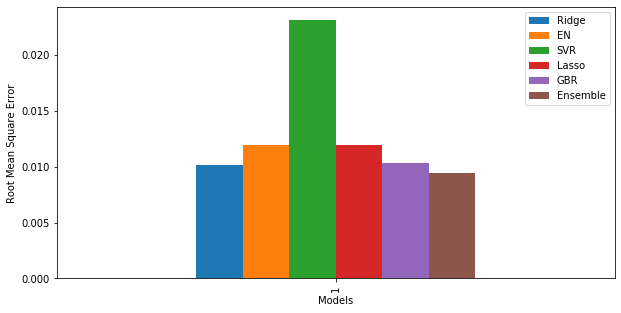

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# evaluation
ax = pd.DataFrame(RMSE_results, index=(1,)).plot(kind='bar', figsize=(10, 5))
ax.set_ylabel('Root Mean Square Error')
ax.set_xlabel('Models')
plt.show()

In [119]:
# prediction and submitting
submission = pd.DataFrame()
submission['Id'] = range(1461, 1461 + 1459)
test_predictions = ve.predict(test_data)
submission['SalePrice'] = np.exp(test_predictions)
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,122721.091235
1,1462,154634.602979
2,1463,175117.673979
3,1464,196427.143568
4,1465,194953.087825
